In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train  = pd.read_csv('./data/train.csv')
test  = pd.read_csv('./data/test.csv')

pd.set_option('display.max_columns', None)
train.head()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0


In [3]:
train.describe()

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
count,15000.000000,14959.000000,14931.000000,14950.000000,14929.000000,14962.000000,14952.000000,14924.000000,14952.000000,14944.000000,14928.000000,14941.000000,14933.000000,14960.000000,14964.000000,14955.000000,14967.000000,14963.000000,14937.000000,14947.000000,14955.000000,14961.000000,14962.000000,14950.000000,14939.000000,14956.000000,14932.000000,15000.000000,15000.000000,1.500000e+04,14947.000000,14934.000000,14921.000000,14936.000000,14930.000000,14938.000000,14936.000000,14935.000000,14936.000000,14920.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,14833.000000,15000.000000,14981.000000,14953.000000,15000.000000,14953.000000,14755.000000,14601.000000,14915.000000,14918.000000,14681.000000,14911.000000,15000.000000
mean,7499.500000,3.972859,4.065702,4.222809,3.795499,3.856503,3.676364,4.183262,3.879013,3.915418,4.110598,3.123419,3.798835,3.701404,3.723603,3.021130,3.433621,3.941121,3.903461,3.385763,3.674022,2.968384,2.412846,3.835452,4.296740,3.151444,4.161465,767.137733,387.965667,2.787959e+03,2.623135,3.037565,3.466122,3.275308,3.876088,3.682287,3.529191,3.039103,3.161422,2.177413,0.958667,0.921667,0.529133,0.968400,0.947333,0.101533,0.236000,0.436600,0.067200,0.956067,0.280067,0.210267,0.761133,0.90620,0.959867,0.980600,2.314232,2.163867,1.703024,1.346018,26.740867,1.185113,4.098340,1.847956,1.633121,1.179917,2.744091,1.938703,0.553533
std,4330.271354,1.095914,1.169681,1.023335,1.219940,1.195622,1.170986,1.059756,1.302081,1.117625,1.047617,1.569761,1.233672,1.321331,1.160248,1.514791,1.399485,1.136492,1.322643,1.546368,1.171751,1.609673,1.375515,1.360530,0.919564,1.376888,1.030046,13835.948037,8513.031610,1.785955e+05,1.150815,1.059533,0.999300,1.175920,0.911841,1.108197,1.015622,1.140791,1.067203,1.034280,0.199067,0.268704,0.499167,0.174939,0.223375,0.302044,0.424636,0.495981,0.250376,0.204954,0.449047,0.407512,0.426405,0.29156,0.196278,0.137931,0.921192,0.728274,0.553286,0.475715,317.058436,0.481993,3.425699,1.223191,0.481969,0.465985,24.109344,0.239882,0.497142
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,13.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,3749.750000,3.000000,4.000000,4.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,4.000000,1.000000,3.000000,3.000000,3.000000,1.000000,2.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,3.000000,4.000000,2.000000,4.000000,4.000000,82.000000,1.260000e+02,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.00000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,17.000000,1.000000,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,0.000000
50%,7499.500000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.00

In [4]:
print(train['education'].isnull().value_counts())
print(train['urban'].isnull().value_counts())
print(train['gender'].isnull().value_counts())
print(train['engnat'].isnull().value_counts())
print(train['age'].isnull().value_counts())
print(train['hand'].isnull().value_counts())
print(train['religion'].isnull().value_counts())
print(train['orientation'].isnull().value_counts())
print(train['voted'].isnull().value_counts())
print(train['married'].isnull().value_counts())
print(train['familysize'].isnull().value_counts())
print(train['ASD'].isnull().value_counts())

False    14833
True       167
Name: education, dtype: int64
False    15000
Name: urban, dtype: int64
False    14981
True        19
Name: gender, dtype: int64
False    14953
True        47
Name: engnat, dtype: int64
False    15000
Name: age, dtype: int64
False    14953
True        47
Name: hand, dtype: int64
False    14755
True       245
Name: religion, dtype: int64
False    14601
True       399
Name: orientation, dtype: int64
False    14915
True        85
Name: voted, dtype: int64
False    14918
True        82
Name: married, dtype: int64
False    14681
True       319
Name: familysize, dtype: int64
False    14911
True        89
Name: ASD, dtype: int64


참조 : https://github.com/paytonjjones/psychometrics/edit/master/GCBS%20Codebook.txt   

#### Yes or No
- voted : 투표를 하고 안하고 인데 null은 그냥 응답 안한거임  drop
- gender : 남녀, other에 해당안하면.. 뭐지..? 그냥 drop
- engnat : null 가지고 있는 행 봤더니 그냥 응답 안한거임 drop
- hand : 양손잡이, 왼손잡이, 오른손잡이가 아니면.. 장애를 가지고 있는 사람이 설문조사 한 경우가 떠오르는데.. 양이 적으니 그냥 drop  
- married : 결혼안함, 함, 이혼 함 이외에 답변은 없어보임.. drop  
- ASD : 뭔지모르겠으니까 그냥 drop


#### Other selection
- familysize, Education, religion, orientation

In [5]:
drop_temp_idx = train[train['voted'].isnull() | train['gender'].isnull() | train['engnat'].isnull() | train['hand'].isnull() | train['married'].isnull() | train['ASD'].isnull()].index
train = train.drop(drop_temp_idx)

In [6]:
train['familysize'].fillna(0, inplace=True)
train['education'].fillna(0, inplace=True)
train['religion'].fillna(0, inplace=True)
train['orientation'].fillna(0, inplace=True)
train

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
0,0,1.0,5.0,5.0,5.0,1.0,4.0,5.0,5.0,1.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,1.0,5.0,1.0,5.0,1.0,1.0,USA,3,553,6,4.0,3.0,5.0,1.0,3.0,5.0,5.0,3.0,5.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,2.0,1,3.0,1.0,20,2.0,12.0,4.0,2.0,1.0,4.0,2.0,1
1,1,4.0,4.0,4.0,4.0,4.0,5.0,4.0,4.0,3.0,3.0,1.0,4.0,5.0,3.0,1.0,2.0,4.0,5.0,1.0,3.0,1.0,1.0,5.0,3.0,2.0,5.0,USA,5,85,120,4.0,2.0,3.0,5.0,3.0,2.0,5.0,1.0,2.0,2.0,1,1,1,1,1,0,1,0,0,1,0,0,1,1,1,1,4.0,2,2.0,1.0,49,1.0,2.0,1.0,1.0,2.0,4.0,2.0,1
2,2,4.0,5.0,5.0,4.0,3.0,5.0,5.0,5.0,4.0,4.0,2.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,5.0,2.0,2.0,1.0,2.0,4.0,2.0,5.0,NLD,9,108,100,1.0,2.0,3.0,1.0,5.0,5.0,3.0,4.0,5.0,2.0,1,1,0,1,1,0,1,1,0,1,0,0,1,1,1,1,2.0,1,1.0,2.0,43,1.0,2.0,2.0,2.0,3.0,4.0,2.0,1
3,3,4.0,4.0,4.0,2.0,4.0,3.0,3.0,5.0,3.0,4.0,5.0,2.0,2.0,4.0,4.0,2.0,4.0,5.0,4.0,3.0,3.0,4.0,3.0,4.0,4.0,2.0,USA,2,121,139,3.0,3.0,3.0,4.0,5.0,3.0,4.0,4.0,3.0,3.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,1.0,3,1.0,1.0,17,2.0,1.0,1.0,2.0,1.0,2.0,2.0,1
4,4,4.0,4.0,4.0,4.0,3.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,ITA,3,640,216,3.0,3.0,4.0,4.0,4.0,4.0,3.0,4.0,3.0,2.0,1,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,1.0,2,2.0,2.0,18,2.0,12.0,1.0,2.0,1.0,1.0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,2.0,5.0,4.0,3.0,3.0,4.0,4.0,4.0,3.0,4.0,1.0,4.0,4.0,3.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,2.0,5.0,4.0,2.0,4.0,USA,12,103,161,2.0,2.0,4.0,3.0,3.0,5.0,3.0,3.0,3.0,3.0,1,1,1,1,1,0,0,0,0,1,0,1,1,1,1,1,2.0,2,2.0,1.0,17,1.0,1.0,3.0,2.0,1.0,3.0,2.0,0
14996,14996,5.0,4.0,5.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,1.0,4.0,4.0,4.0,2.0,5.0,5.0,4.0,1.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0,USA,31,106,179,3.0,2.0,4.0,5.0,4.0,3.0,4.0,1.0,2.0,2.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,4.0,1,2.0,2.0,45,1.0,3.0,1.0,1.0,2.0,3.0,2.0,1
14997,14997,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,2.0,5.0,5.0,3.0,4.0,USA,17,103,168,1.0,3.0,2.0,5.0,1.0,5.0,3.0,3.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,1,1,1,1,2.0,2,2.0,1.0,20,1.0,1.0,2.0,1.0,1.0,3.0,1.0,1
14998,14998,5.0,5.0,4.0,5.0,5.0,5.0,5.0,1.0,5.0,5.0,3.0,5.0,4.0,4.0,1.0,5.0,4.0,5.0,5.0,2.0,5.0,3.0,5.0,3.0,3.0,5.0,USA,14,68,109,1.0,1.0,3.0,5.0,4.0,5.0,5.0,4.0,2.0,1.0,1,1,1,1,1,0,0,1,0,1,0,1,1,1,1,1,3.0,2,2.0,1.0,29,1.0,12.0,4.0,2.0,2.0,2.0,1.0,0


In [7]:
not_survey_idx = train[train.isnull().sum(1) > 5].index
train = train.drop(not_survey_idx)

In [8]:
train.isnull().sum()

index          0
Q1            33
Q2            61
Q3            41
Q4            60
              ..
voted          0
married        0
familysize     0
ASD            0
nerdiness      0
Length: 70, dtype: int64

In [9]:
train.dropna(inplace=True)
train.isnull().sum()

index         0
Q1            0
Q2            0
Q3            0
Q4            0
             ..
voted         0
married       0
familysize    0
ASD           0
nerdiness     0
Length: 70, dtype: int64

In [10]:
def outlier(df, col, z):
    return df[abs(df[col] - np.mean(df[col]))/np.std(df[col])>z].index
  
train.loc[outlier(train, 'familysize', 10)]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
1019,1019,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,USA,2,39,172,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,4.0,2,3.0,2.0,100,3.0,10.0,5.0,1.0,1.0,2919.0,1.0,0


In [11]:
train.loc[outlier(train, 'age', 80)]

,index,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,country,introelapse,testelapse,surveyelapse,TIPI1,TIPI2,TIPI3,TIPI4,TIPI5,TIPI6,TIPI7,TIPI8,TIPI9,TIPI10,VCL1,VCL2,VCL3,VCL4,VCL5,VCL6,VCL7,VCL8,VCL9,VCL10,VCL11,VCL12,VCL13,VCL14,VCL15,VCL16,education,urban,gender,engnat,age,hand,religion,orientation,voted,married,familysize,ASD,nerdiness
9273,9273,5.0,3.0,1.0,5.0,4.0,3.0,3.0,4.0,5.0,1.0,4.0,3.0,4.0,2.0,1.0,3.0,2.0,1.0,3.0,3.0,3.0,1.0,5.0,4.0,3.0,2.0,USA,1,89,125,1.0,5.0,1.0,5.0,5.0,1.0,4.0,5.0,1.0,1.0,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1.0,2,2.0,1.0,38822,1.0,2.0,3.0,2.0,1.0,3.0,2.0,1


In [12]:
find_age = train['age'] > 80
print(find_age.sum())
find_family = train['familysize'] > 8
print(find_family.sum())

8
39


In [13]:
train.reset_index(drop=True, inplace=True)

In [ ]:
outlier_age_idx = train[train['age'] > 90].index
outlier_fam_idx = train[train['familysize'] > 10].index
train = train.drop(outlier_age_idx)
train = train.drop(outlier_fam_idx)

In [15]:
train_df = train

<AxesSubplot:ylabel='nerdiness'>

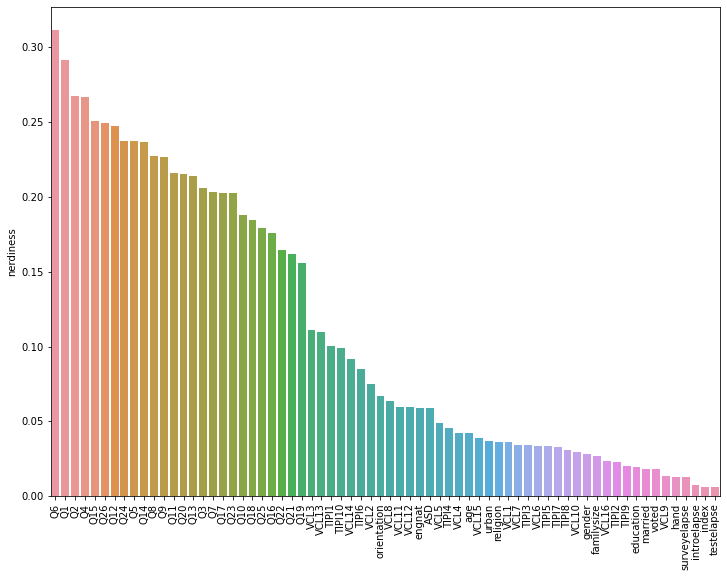

In [16]:
plt.figure(figsize=(12,9)) # 사이즈 변경
plt.xticks(rotation = 90) # x축 text 회전
sns.barplot(x = abs(train_df.corr()["nerdiness"]).sort_values(ascending = False)[1:].index ,
            y = abs(train_df.corr()["nerdiness"]).sort_values(ascending = False)[1:]) # nerdiness을 제외하고 나머지와의 상관관계 시각화

<AxesSubplot:xlabel='age', ylabel='count'>

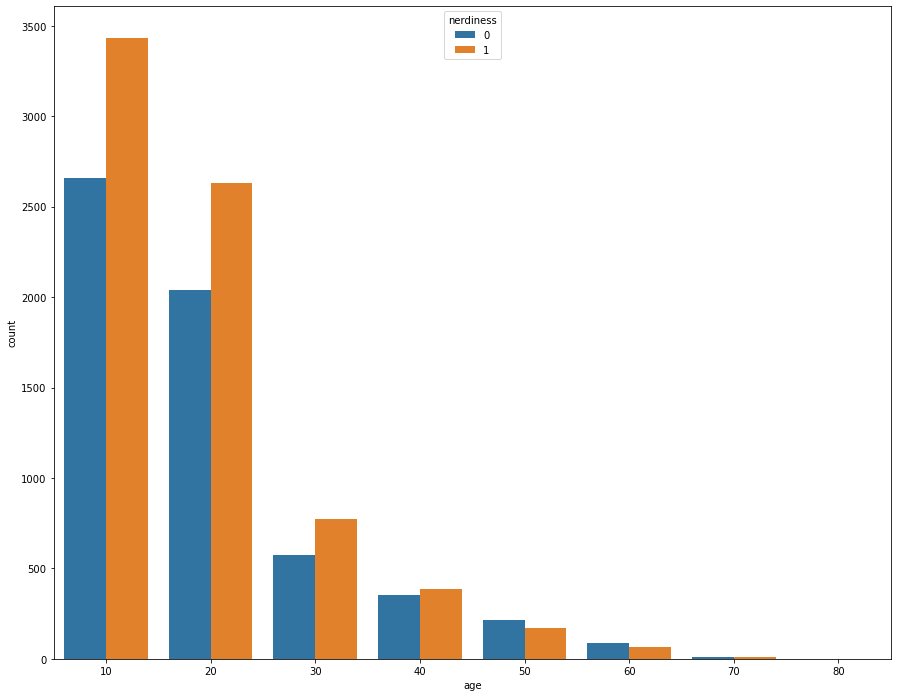

In [18]:
# Age
plt.figure(figsize=(15,12)) # 사이즈 변경
sns.countplot(data= train_df, x= train_df['age']//10 * 10,hue = 'nerdiness') # 연령대별 target 분포

In [19]:
drop_temp_idx = train[train['orientation'].isnull()].index
temp_train = train.drop(drop_temp_idx)

In [21]:
temp_train[temp_train['orientation'].isnull()].value_counts()

Series([], dtype: int64)

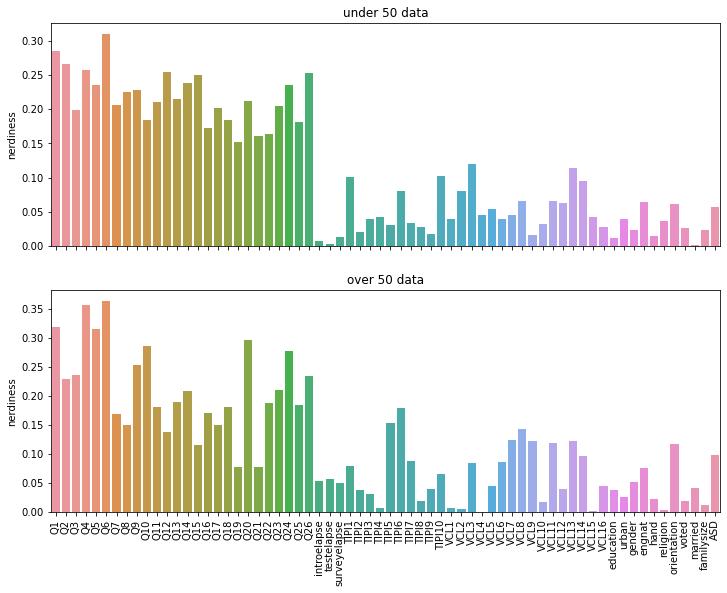

In [18]:
fig, ax = plt.subplots(2,1, figsize=(12,9))
plt.xticks(rotation = 90) # x축 text 회전

under_50 = sns.barplot(x = abs(train_df[train_df["age"]< 50].corr()["nerdiness"]).drop(['nerdiness','index','age']).index ,
            y = abs(train_df[train_df["age"]< 50].corr()["nerdiness"]).drop(['nerdiness','index','age']), ax = ax[0])  #nerdiness , index , age 제외한 상관계수 시각화
under_50.set(xticklabels=[]) # 50미만 시각화에 x라벨을 없애줌
under_50.set(title='under 50 data') # 

over_50 = sns.barplot(x = abs(train_df[train_df["age"]>= 50].corr()["nerdiness"]).drop(['nerdiness','index','age']).index ,
            y = abs(train_df[train_df["age"]>= 50].corr()["nerdiness"]).drop(['nerdiness','index','age']), ax = ax[1]) 
over_50.set(title='over 50 data') # 

plt.show()

In [20]:
vcls = []
for i in range(1, 17):
    vcls.append('VCL' + str(i))
    
train_df = train_df.drop(columns=vcls)
train_df = train_df.drop(['engnat', 'introelapse', 'testelapse', 'surveyelapse', 'country'], axis=1)

In [21]:
test_df = test

In [22]:
test_df = test_df.drop(columns=vcls)
test_df = test_df.drop(['engnat', 'introelapse', 'testelapse', 'surveyelapse', 'country'], axis=1)

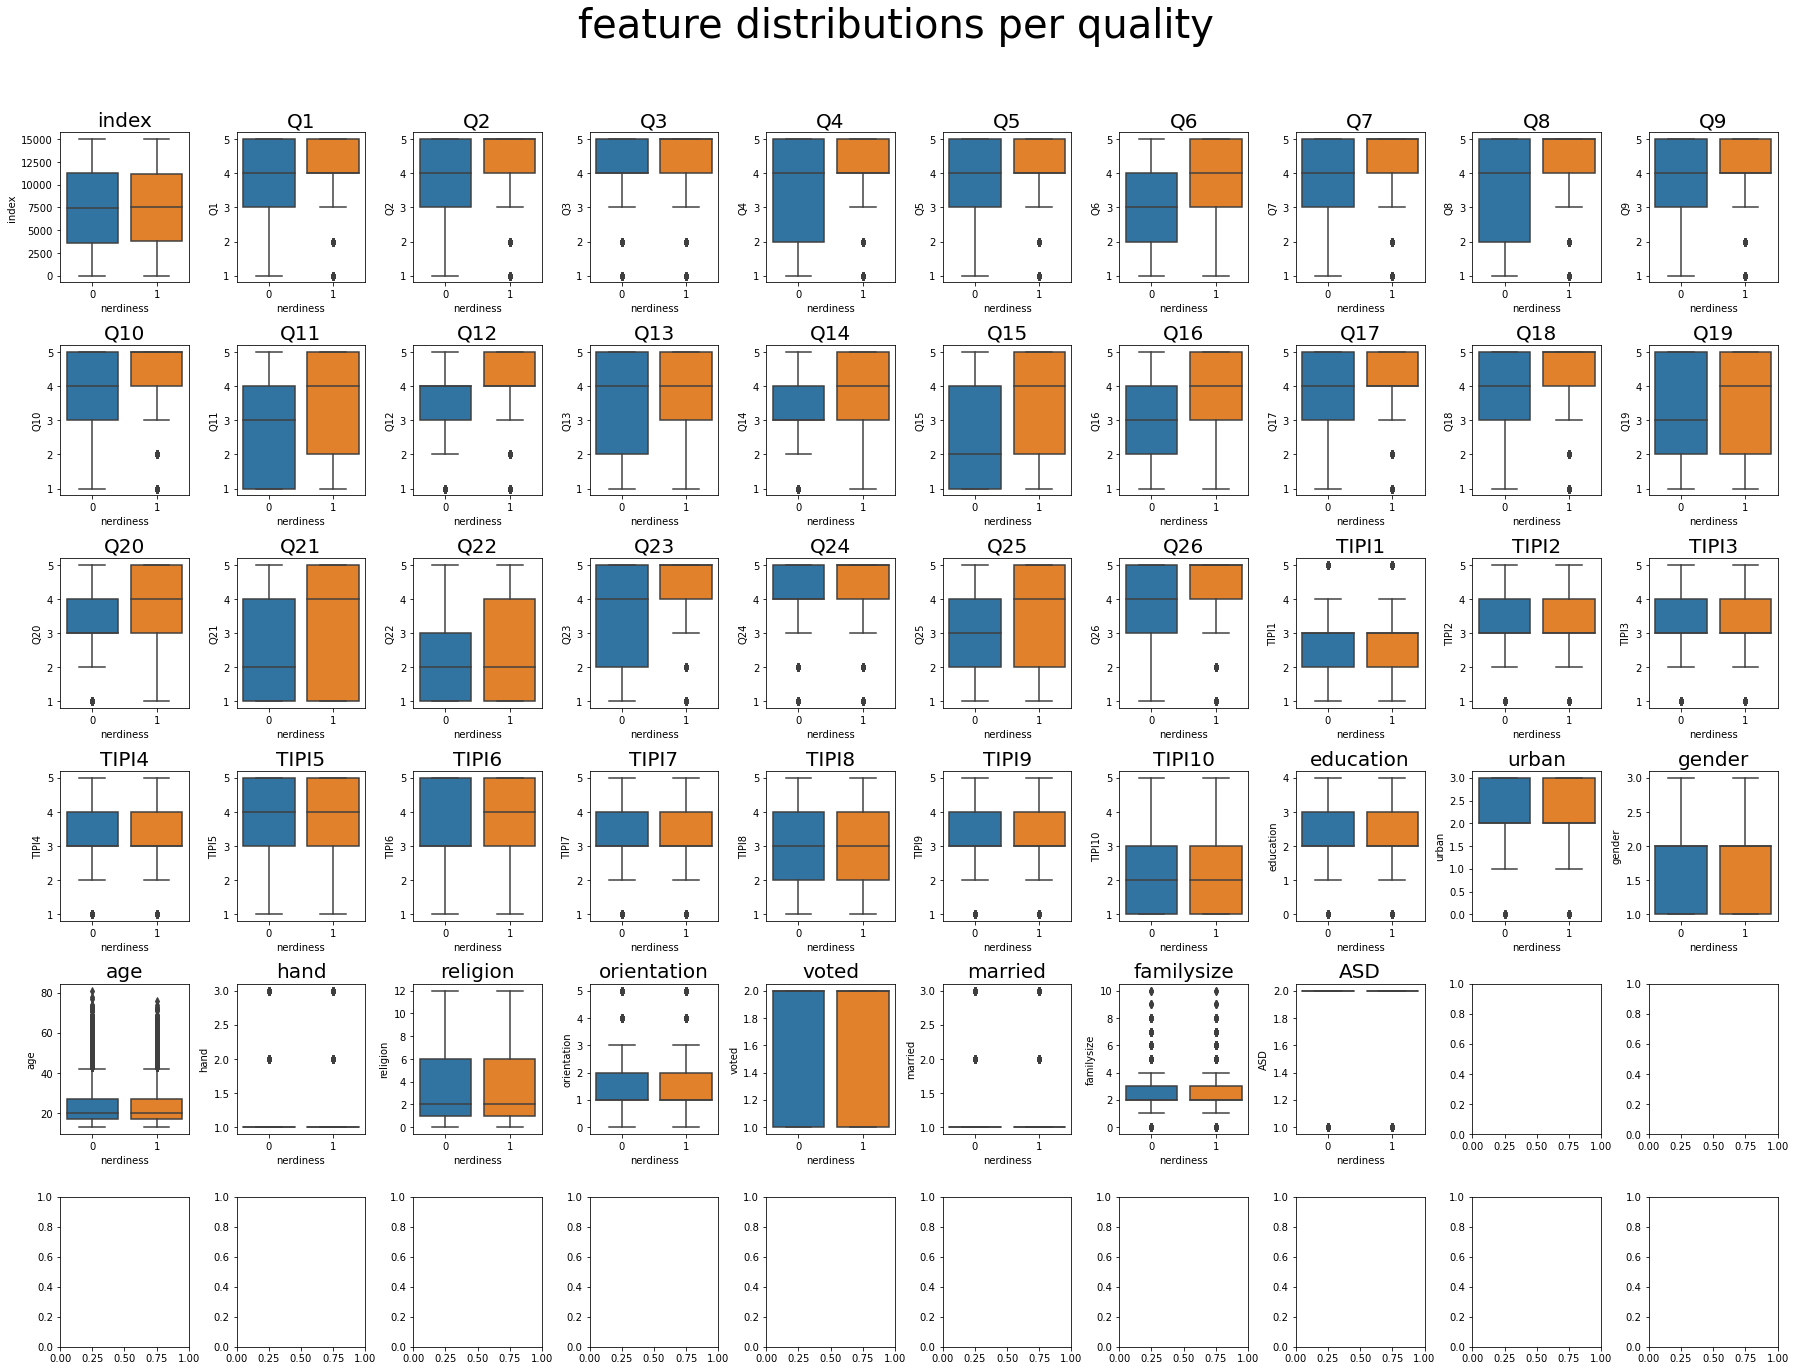

In [23]:
# 수치형 데이터 분리
numeric_feature = train_df.columns[(train_df.dtypes=='int64') | (train_df.dtypes=='float64')]
num_train_df = train_df[numeric_feature]

# 박스플롯
fig, axes = plt.subplots(6, 10, figsize=(25, 20))


fig.suptitle('feature distributions per quality', fontsize= 40)
for ax, col in zip(axes.flat, num_train_df.columns[:-1]):
    sns.boxplot(x='nerdiness', y= col, ax=ax, data=num_train_df)
    ax.set_title(col, fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

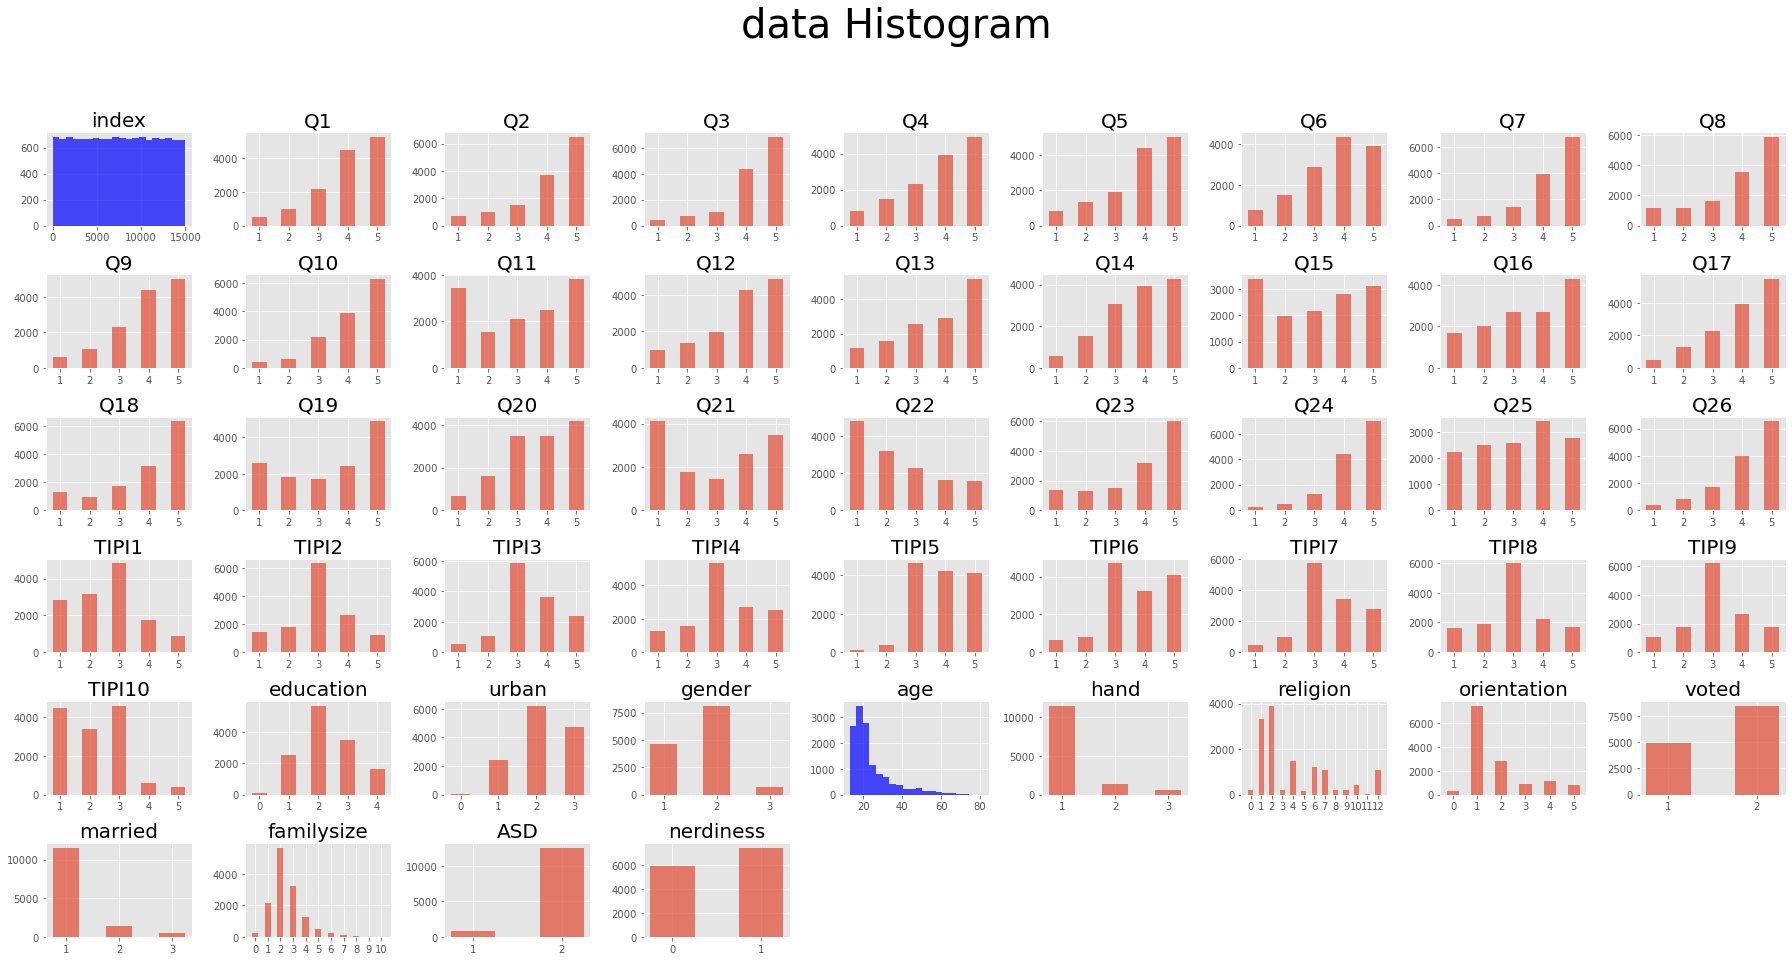

In [24]:
plt.style.use('ggplot')

# 히스토그램을 사용해서 데이터의 분포 살펴보기
plt.figure(figsize=(25, 20))
plt.suptitle("data Histogram", fontsize = 40)

# id는 제외하고 시각화
cols = train_df.columns
for i in range(len(cols)):
    plt.subplot(9, 9, i+1) # 최대 5 by 5, 25개의 특징 분포를 확인할 으수 있습니다.
    plt.title(cols[i], fontsize=20) # 각 분포그림의 제목을 특징명으로 설정합니다.
    if len(train_df[cols[i]].unique()) > 20: # 해당 특징의 고유한 값 종류가 20개가 넘으면
        plt.hist(train_df[cols[i]], bins=20, color='b', alpha=0.7) # 히스토그램을 출력합니다. bins는 칸을 나누는 값이며 alpha는 투명도입니다.
        
    else: # 해당 특징의 고유한 값 종류가 20개가 넘지 않으면
        temp = train_df[cols[i]].value_counts() # 각 특징의 값 종류의 개수들을 temp에 저장합니다.
        plt.bar(temp.keys(), temp.values, width=0.5, alpha=0.7)
        plt.xticks(temp.keys())
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
X = train_df.drop(columns='nerdiness')
y = train_df['nerdiness']

In [26]:
from pycaret.classification import *

model = setup(
    data = train_df,
    target = "nerdiness",
    use_gpu = True,
    train_size=0.9,
    session_id = 42
)

,Description,Value
0,session_id,42
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(13416, 49)"
5,Missing Values,False
6,Numeric Features,45
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [28]:
rf_model = create_model('rf', fold=5)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7636,0.8523,0.8212,0.7704,0.7950,0.5164,0.5179
1,0.7723,0.8544,0.8330,0.7754,0.8031,0.5338,0.5358
2,0.7863,0.8619,0.8486,0.7856,0.8158,0.5623,0.5647
3,0.7834,0.8634,0.8315,0.7910,0.8107,0.5581,0.5590
4,0.7838,0.8603,0.8500,0.7816,0.8144,0.5565,0.5593
Mean,0.7779,0.8585,0.8368,0.7808,0.8078,0.5454,0.5473
Std,0.0086,0.0044,0.0109,0.0073,0.0078,0.0176,0.0178


In [27]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7343,0.8172,0.7967,0.7448,0.7699,0.4563,0.4578
1,0.7210,0.7915,0.8027,0.7262,0.7625,0.4265,0.4297
2,0.7475,0.8167,0.8220,0.7497,0.7841,0.4816,0.4846
3,0.7450,0.8159,0.8131,0.7507,0.7806,0.4774,0.4796
4,0.7597,0.8376,0.8220,0.7652,0.7926,0.5080,0.5098
5,0.7316,0.8007,0.7967,0.7417,0.7682,0.4503,0.4519
6,0.7672,0.8312,0.8158,0.7776,0.7962,0.5251,0.5259
7,0.7399,0.8187,0.7949,0.7525,0.7731,0.4688,0.4698
8,0.7614,0.8230,0.8158,0.7700,0.7922,0.5126,0.5138


In [28]:
# xgboost = create_model('xgboost', fold=5)

In [ ]:
# et_model = create_model('et', fold=5)

In [ ]:
# top_5_model = compare_models(
#                sort="AUC",
#                n_select=5)

In [ ]:
# blended = blend_models(estimator_list = top5_model, fold = 5, method = 'soft')

In [ ]:
pred_holdout = predict_model(rf_model)

In [ ]:
final_model = finalize_model(rf_model)

In [ ]:
pd.set_option('display.max_columns', None)
test_df.head(3)

In [ ]:
predictions = predict_model(final_model, data = test_df)

In [ ]:
predictions

In [ ]:
submission = pd.read_csv('./data/sample_submission.csv')
predictions.Label.astype(int)
submission['nerdiness'] = predictions['Label']
submission.to_csv('submission_proba2.csv', index=False)

------------------------------------------------------------------------------------

In [ ]:
# best = compare_models(exclude = ['lr', 'dt', 'lightgbm'])


In [29]:
from pycaret.classification import *

model = setup(
    data = train_df,
    target = "nerdiness",
    use_gpu = True,
    train_size=0.9,
    session_id = 42
)

top_5_model = compare_models(
               sort="AUC",
               n_select=5)


,Description,Value
0,session_id,42
1,Target,nerdiness
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(13416, 49)"
5,Missing Values,False
6,Numeric Features,45
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


IntProgress(value=0, description='Processing: ', max=79)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,11:37:26
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Extreme Gradient Boosting


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.7894,0.8764,0.8458,0.7913,0.8175,0.5691,0.5711,0.6350
rf,Random Forest Classifier,0.7907,0.8695,0.8462,0.7929,0.8186,0.5719,0.5739,0.5420
gbc,Gradient Boosting Classifier,0.7306,0.8022,0.7999,0.7389,0.7681,0.4478,0.4499,2.1970
lda,Linear Discriminant Analysis,0.7262,0.7947,0.8069,0.7306,0.7668,0.4372,0.4406,0.0500
ada,Ada Boost Classifier,0.7264,0.7929,0.7873,0.7395,0.7625,0.4407,0.4421,0.4610
lr,Logistic Regression,0.7032,0.7678,0.7916,0.7102,0.7485,0.3892,0.3928,0.2300
nb,Naive Bayes,0.6990,0.7622,0.7530,0.7204,0.7362,0.3862,0.3868,0.0110
dt,Decision Tree Classifier,0.6973,0.6930,0.7300,0.7283,0.7290,0.3861,0.3863,0.1020
qda,Quadratic Discriminant Analysis,0.6023,0.6629,0.5798,0.6678,0.5940,0.2101,0.2221,0.0360
knn,K Neighbors Classifier,0.5554,0.5578,0.6767,0.5883,0.6294,0.0806,0.0819,0.3220


In [ ]:
blended = blend_models(estimator_list = top_5_model, fold = 5, method = 'soft')
pred_holdout = predict_model(blended)
final_model = finalize_model(blended)
pd.set_option('display.max_columns', None)
test_df.head(3)
predictions = predict_model(final_model, data = test_df)
submission = pd.read_csv('./data/sample_submission.csv')
predictions.Label.astype(int)
submission['nerdiness'] = predictions['Label']
submission.to_csv('submission_proba3.csv', index=False)